In [1]:
import pandas as pd
from pandas.tseries.offsets import MonthBegin
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta

# refinancing_rate

In [2]:
url = "https://www.cba.am/stat/stat_data_eng/8_policy_rates_eng.xlsx"
refinancing_rate = pd.read_excel(url)

print(refinancing_rate)

    Interest rates of the CBA operations in financial market (%)  \
0                                                  NaN             
1                                          Time Period             
2                                27.12.2003-08.03.2004             
3                                09.03.2004-06.04.2004             
4                                07.04.2004-13.07.2004             
..                                                 ...             
136                              01.11.2023-12.12.2023             
137                              13.12.2023-30.01.2024             
138                                        31.01.2024-             
139                                                NaN             
140  1 Untill February 2010 this operation was call...             

            Unnamed: 1          Unnamed: 2     Unnamed: 3  
0                  NaN                 NaN            NaN  
1    Refinancing rates  Deposits Attracted  Lombard Repo1  
2  

In [3]:
refinancing_rate = refinancing_rate.iloc[2:]
refinancing_rate.columns = ["Time_Period", "Refinancing_Rates", "Deposits_Attracted", "Lombard_Repo1"]

refinancing_rate = refinancing_rate[['Time_Period', 'Refinancing_Rates']]

refinancing_rate.dropna(inplace=True)

refinancing_rate['Start_Date_Str'] = refinancing_rate['Time_Period'].str.split('-').str[0].str.strip()

refinancing_rate['Start_Date'] = pd.to_datetime(refinancing_rate['Start_Date_Str'], format='%d.%m.%Y', errors='coerce')

refinancing_rate.drop('Start_Date_Str', axis=1, inplace=True)

refinancing_rate.drop('Time_Period', axis=1, inplace=True)

refinancing_rate.set_index('Start_Date', inplace=True)

monthly_df = refinancing_rate.resample('M').ffill()

In [4]:
print(refinancing_rate)

           Refinancing_Rates
Start_Date                  
2003-12-27                 9
2004-03-09                 6
2004-04-07                 6
2004-07-14                 5
2004-08-23                 4
...                      ...
2023-08-02             10.25
2023-09-13              9.75
2023-11-01               9.5
2023-12-13              9.25
2024-01-31              8.75

[137 rows x 1 columns]


In [5]:
refinancing_rate.index = refinancing_rate.index.to_period('M')
print(refinancing_rate)

           Refinancing_Rates
Start_Date                  
2003-12                    9
2004-03                    6
2004-04                    6
2004-07                    5
2004-08                    4
...                      ...
2023-08                10.25
2023-09                 9.75
2023-11                  9.5
2023-12                 9.25
2024-01                 8.75

[137 rows x 1 columns]


In [6]:
refinancing_rate.index = refinancing_rate.index.to_timestamp()

# Calculate the start and end dates
start_date = refinancing_rate.index.min()
end_date = refinancing_rate.index.max()


# Generate all months between start and end
current_date = start_date

while current_date <= end_date:
    if current_date not in refinancing_rate.index:
        refinancing_rate.at[current_date, 'Refinancing_Rates'] = pd.NA

    current_date += relativedelta(months=1)

refinancing_rate.sort_index(inplace=True)

# Display the updated DataFrame
print(refinancing_rate.head(15))  # Adjust as needed
print(refinancing_rate.tail())

           Refinancing_Rates
Start_Date                  
2003-12-01                 9
2004-01-01              <NA>
2004-02-01              <NA>
2004-03-01                 6
2004-04-01                 6
2004-05-01              <NA>
2004-06-01              <NA>
2004-07-01                 5
2004-08-01                 4
2004-09-01              <NA>
2004-10-01              3.75
2004-11-01              <NA>
2004-12-01              <NA>
2005-01-01               4.5
2005-02-01              <NA>
           Refinancing_Rates
Start_Date                  
2023-09-01              9.75
2023-10-01              <NA>
2023-11-01               9.5
2023-12-01              9.25
2024-01-01              8.75


In [7]:
# Fill NaN values with the previous non-NaN value in the Refinancing_Rates column
refinancing_rate['Refinancing_Rates'] = refinancing_rate['Refinancing_Rates'].fillna(method='ffill')

# Display the DataFrame to verify the NaN values are filled
print(refinancing_rate.head(15))  # Adjust as needed
print(refinancing_rate.tail())


            Refinancing_Rates
Start_Date                   
2003-12-01               9.00
2004-01-01               9.00
2004-02-01               9.00
2004-03-01               6.00
2004-04-01               6.00
2004-05-01               6.00
2004-06-01               6.00
2004-07-01               5.00
2004-08-01               4.00
2004-09-01               4.00
2004-10-01               3.75
2004-11-01               3.75
2004-12-01               3.75
2005-01-01               4.50
2005-02-01               4.50
            Refinancing_Rates
Start_Date                   
2023-09-01               9.75
2023-10-01               9.75
2023-11-01               9.50
2023-12-01               9.25
2024-01-01               8.75


/var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/ipykernel_8282/3379696024.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  refinancing_rate['Refinancing_Rates'] = refinancing_rate['Refinancing_Rates'].fillna(method='ffill')


In [8]:
refinancing_rate.index = refinancing_rate.index.to_period('M')
print(refinancing_rate)

            Refinancing_Rates
Start_Date                   
2003-12                  9.00
2004-01                  9.00
2004-02                  9.00
2004-03                  6.00
2004-04                  6.00
...                       ...
2023-09                  9.75
2023-10                  9.75
2023-11                  9.50
2023-12                  9.25
2024-01                  8.75

[246 rows x 1 columns]


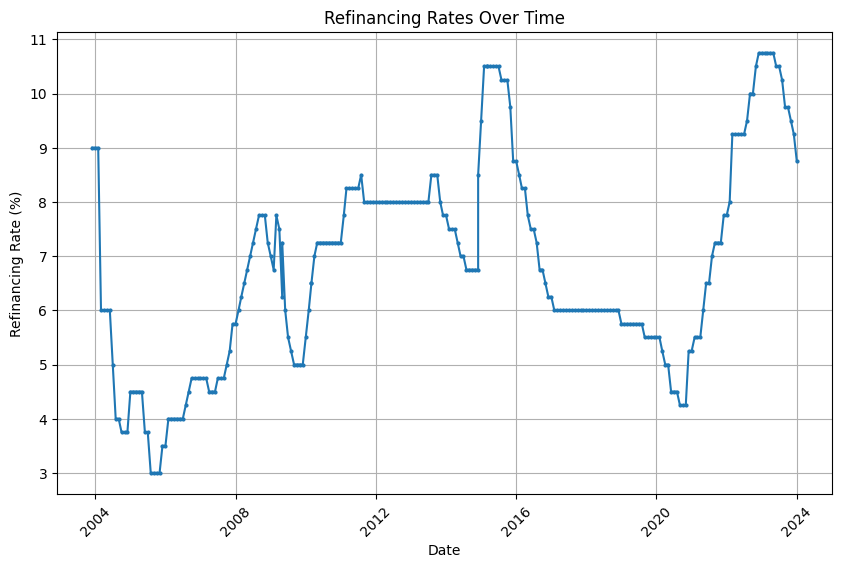

In [9]:
# Correctly convert PeriodIndex to DateTimeIndex
refinancing_rate.index = refinancing_rate.index.to_timestamp()

# Now proceed with plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(refinancing_rate.index, refinancing_rate['Refinancing_Rates'], marker='o', linestyle='-', markersize=2)
plt.title('Refinancing Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Refinancing Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.show()

# dolarization

In [10]:
url = 'https://www.cba.am/stat/stat_data_eng/5_Deposits%20by%20sectors_eng.xlsx'

In [11]:
deposits = pd.read_excel(url)

print(deposits)

    COMMERCIAL BANKS DEPOSITS BY SECTORS OF ECONOMY 1           Unnamed: 1  \
0                            (end of period, mln AMD)                  NaN   
1                                                 NaN                  NaN   
2                                             Column1            Column110   
3                                                 NaN  2000-01-01 00:00:00   
4                                      Non Residents2         33613.476513   
5                                                  FX         31572.713943   
6                                                 AMD           2040.76257   
7                                           Residents         66613.842576   
8                                                 AMD         15730.223768   
9                Demand Deposits (including accounts)         11342.443363   
10                         Non-Financial Corporations          9484.700614   
11                                            Private          6

In [12]:
# Step 1: Extract years and values
years = deposits.iloc[3, 1:]  # Skip the first column which is a description, not a year
residents = deposits.iloc[7, 1:]  # Similarly, skip the description column
fx = deposits.iloc[25, 1:]

# Step 2: Create a new DataFrame with 'Year' and 'Total loans of banking system / GDP' as columns
deposits_new = pd.DataFrame({
    'Time_Period': years.values,  # Convert to array to ensure proper formatting
    'Residents': residents.values,  # Ditto
    'FX': fx.values
})

In [13]:
deposits_new

Time_Period       Residents              FX
0    2000-01-01    66613.842576    50883.618809
1    2000-02-01    68854.367334    54183.320013
2    2000-03-01    73008.897743    56984.564361
3    2000-04-01    72366.141054    56525.324563
4    2000-05-01    73327.849158    57611.385772
..          ...             ...             ...
284  2023-09-30  4094734.428574  1700698.303784
285  2023-10-31  4202574.867869   1763710.10907
286  2023-11-30  4230840.320815  1756651.023428
287  2023-12-31  4320279.315355   1755887.26559
288  2024-01-31   4267342.85177  1744397.570658

[289 rows x 3 columns]

In [14]:
deposits_new['Dolarization'] = deposits_new['Residents']/deposits_new['FX']
deposits_new = deposits_new.drop('FX', axis = 1)
deposits_new = deposits_new.drop('Residents', axis = 1)
deposits_new['Time_Period'] = pd.to_datetime(deposits_new['Time_Period'])
deposits_new['Dolarization'] = pd.to_numeric(deposits_new['Dolarization'])

In [15]:
deposits_new = deposits_new[deposits_new['Time_Period'] >= '2003-12-01']
deposits_new['Time_Period'] = deposits_new['Time_Period'].dt.to_period('M').dt.to_timestamp()

In [16]:
deposits_new

Time_Period  Dolarization
47   2003-12-01      1.406075
48   2004-01-01      1.402145
49   2004-02-01      1.378638
50   2004-03-01      1.373693
51   2004-04-01      1.389632
..          ...           ...
284  2023-09-01      2.407678
285  2023-10-01      2.382804
286  2023-11-01      2.408469
287  2023-12-01      2.460454
288  2024-01-01      2.446313

[242 rows x 2 columns]

In [17]:
refinancing_rate

Refinancing_Rates
Start_Date                   
2003-12-01               9.00
2004-01-01               9.00
2004-02-01               9.00
2004-03-01               6.00
2004-04-01               6.00
...                       ...
2023-09-01               9.75
2023-10-01               9.75
2023-11-01               9.50
2023-12-01               9.25
2024-01-01               8.75

[246 rows x 1 columns]

In [18]:
deposits_new.set_index('Time_Period', inplace=True)
#refinancing_rate.set_index('Time_Period', inplace=True)

In [19]:
# Concatenate the DataFrames along the columns
data = pd.concat([refinancing_rate, deposits_new], axis=1)

In [20]:
data

Refinancing_Rates  Dolarization
2003-12-01               9.00      1.406075
2004-01-01               9.00      1.402145
2004-02-01               9.00      1.378638
2004-03-01               6.00      1.373693
2004-04-01               6.00      1.389632
...                       ...           ...
2023-09-01               9.75      2.407678
2023-10-01               9.75      2.382804
2023-11-01               9.50      2.408469
2023-12-01               9.25      2.460454
2024-01-01               8.75      2.446313

[246 rows x 2 columns]

In [21]:
print(data.columns)

Index(['Refinancing_Rates', 'Dolarization'], dtype='object')


In [22]:
data = data.reset_index()
data.rename(columns={'index': 'Time_Period'}, inplace=True)
#data = data.drop('level_0')

In [23]:
data

Time_Period  Refinancing_Rates  Dolarization
0    2003-12-01               9.00      1.406075
1    2004-01-01               9.00      1.402145
2    2004-02-01               9.00      1.378638
3    2004-03-01               6.00      1.373693
4    2004-04-01               6.00      1.389632
..          ...                ...           ...
241  2023-09-01               9.75      2.407678
242  2023-10-01               9.75      2.382804
243  2023-11-01               9.50      2.408469
244  2023-12-01               9.25      2.460454
245  2024-01-01               8.75      2.446313

[246 rows x 3 columns]

# test

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [25]:
data['Time_Period'] = pd.to_datetime(data['Time_Period'])
data['Year'] = data['Time_Period'].dt.year
data['Month'] = data['Time_Period'].dt.month

In [26]:
# Prepare features and target variable
X = data[['Year', 'Month','Dolarization']]  # Add more features if needed
y = data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 4.62
R-squared: 0.12


worse than expected continue to make the data bigger with features included 

In [27]:
print(data)

    Time_Period  Refinancing_Rates  Dolarization  Year  Month
0    2003-12-01               9.00      1.406075  2003     12
1    2004-01-01               9.00      1.402145  2004      1
2    2004-02-01               9.00      1.378638  2004      2
3    2004-03-01               6.00      1.373693  2004      3
4    2004-04-01               6.00      1.389632  2004      4
..          ...                ...           ...   ...    ...
241  2023-09-01               9.75      2.407678  2023      9
242  2023-10-01               9.75      2.382804  2023     10
243  2023-11-01               9.50      2.408469  2023     11
244  2023-12-01               9.25      2.460454  2023     12
245  2024-01-01               8.75      2.446313  2024      1

[246 rows x 5 columns]


# core_infaltion

In [28]:
core_inflation = pd.read_excel("https://www.cba.am/stat/stat_data_eng/core_inflation_CBA_eng.xlsx")

# Display the data
print(core_inflation)

    Unnamed: 0                                     CORE INFLATION  \
0          NaN  Seasonal Products &\nAdministrative Regulated ...   
1          NaN    compared to the same month of the previous year   
2       2006/1                                           98.59481   
3       2006/2                                          99.083378   
4       2006/3                                           99.60412   
..         ...                                                ...   
219     2024/2                                          99.345842   
220        NaN                                                NaN   
221          *  currently this indicator is being used for CBA...   
222         **  this indicator is being used for other analyti...   
223        ***  due to consumer basket weights review by SC RA...   

                         Unnamed: 2  \
0                               NaN   
1    compared to the previous month   
2                        100.291715   
3              

In [29]:
core_inflation = core_inflation.iloc[:, [0, 1, 3]]

print(core_inflation)

    Unnamed: 0                                     CORE INFLATION  \
0          NaN  Seasonal Products &\nAdministrative Regulated ...   
1          NaN    compared to the same month of the previous year   
2       2006/1                                           98.59481   
3       2006/2                                          99.083378   
4       2006/3                                           99.60412   
..         ...                                                ...   
219     2024/2                                          99.345842   
220        NaN                                                NaN   
221          *  currently this indicator is being used for CBA...   
222         **  this indicator is being used for other analyti...   
223        ***  due to consumer basket weights review by SC RA...   

                                          Unnamed: 3  
0                    Exclusion & Adjustment method**  
1    compared to the same month of the previous year  
2     

In [30]:
core_inflation.dropna(inplace=True)

print(core_inflation)

    Unnamed: 0 CORE INFLATION  Unnamed: 3
2       2006/1       98.59481   98.743545
3       2006/2      99.083378   99.101892
4       2006/3       99.60412   99.447619
5       2006/4     101.191824  100.872023
6       2006/5     102.216325  101.712238
..         ...            ...         ...
215    2023/10      99.953496  101.197253
216    2023/11      99.756096  100.990389
217    2023/12      99.606461  100.704472
218  2024/1***      99.559165  100.500455
219     2024/2      99.345842  100.132493

[218 rows x 3 columns]


In [31]:
core_inflation.rename(columns={'Unnamed: 0': 'Time_Period', 'CORE INFLATION': 'Core_Inflation_1', 'Unnamed: 3': 'Core_Inflation_2'}, inplace=True)

print(core_inflation)

    Time_Period Core_Inflation_1 Core_Inflation_2
2        2006/1         98.59481        98.743545
3        2006/2        99.083378        99.101892
4        2006/3         99.60412        99.447619
5        2006/4       101.191824       100.872023
6        2006/5       102.216325       101.712238
..          ...              ...              ...
215     2023/10        99.953496       101.197253
216     2023/11        99.756096       100.990389
217     2023/12        99.606461       100.704472
218   2024/1***        99.559165       100.500455
219      2024/2        99.345842       100.132493

[218 rows x 3 columns]


In [32]:
core_inflation['Core_Inflation_1'] = core_inflation['Core_Inflation_1']-100
core_inflation['Core_Inflation_2'] = core_inflation['Core_Inflation_2']-100

print(core_inflation)

    Time_Period Core_Inflation_1 Core_Inflation_2
2        2006/1         -1.40519        -1.256455
3        2006/2        -0.916622        -0.898108
4        2006/3         -0.39588        -0.552381
5        2006/4         1.191824         0.872023
6        2006/5         2.216325         1.712238
..          ...              ...              ...
215     2023/10        -0.046504         1.197253
216     2023/11        -0.243904         0.990389
217     2023/12        -0.393539         0.704472
218   2024/1***        -0.440835         0.500455
219      2024/2        -0.654158         0.132493

[218 rows x 3 columns]


In [33]:
# Convert 'Time_Period' to datetime format if it's not already
core_inflation['Time_Period'] = core_inflation['Time_Period'].str.replace('\*\*\*', '', regex=True)

core_inflation['Time_Period'] = pd.to_datetime(core_inflation['Time_Period'])



/var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/ipykernel_8282/2589275459.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  core_inflation['Time_Period'] = pd.to_datetime(core_inflation['Time_Period'])


In [34]:
print(core_inflation)

    Time_Period Core_Inflation_1 Core_Inflation_2
2    2006-01-01         -1.40519        -1.256455
3    2006-02-01        -0.916622        -0.898108
4    2006-03-01         -0.39588        -0.552381
5    2006-04-01         1.191824         0.872023
6    2006-05-01         2.216325         1.712238
..          ...              ...              ...
215  2023-10-01        -0.046504         1.197253
216  2023-11-01        -0.243904         0.990389
217  2023-12-01        -0.393539         0.704472
218  2024-01-01        -0.440835         0.500455
219  2024-02-01        -0.654158         0.132493

[218 rows x 3 columns]


In [35]:
# Filter the DataFrame to include only rows on or after 2006-01-01
#filtered_data = data[data['Time_Period'] >= pd.Timestamp('2006-01-01')]

In [36]:
filtered_data = data


filtered_data



Time_Period  Refinancing_Rates  Dolarization  Year  Month
0    2003-12-01               9.00      1.406075  2003     12
1    2004-01-01               9.00      1.402145  2004      1
2    2004-02-01               9.00      1.378638  2004      2
3    2004-03-01               6.00      1.373693  2004      3
4    2004-04-01               6.00      1.389632  2004      4
..          ...                ...           ...   ...    ...
241  2023-09-01               9.75      2.407678  2023      9
242  2023-10-01               9.75      2.382804  2023     10
243  2023-11-01               9.50      2.408469  2023     11
244  2023-12-01               9.25      2.460454  2023     12
245  2024-01-01               8.75      2.446313  2024      1

[246 rows x 5 columns]

In [37]:
# Merge core_inflation into filtered_data based on a common key (assuming 'Time_Period' is that key and exists in both)
#filtered_data = filtered_data.merge(core_inflation[['Time_Period', 'Core_Inflation_1', 'Core_Inflation_2']], on='Time_Period', how='left')


In [38]:
filtered_data

Time_Period  Refinancing_Rates  Dolarization  Year  Month
0    2003-12-01               9.00      1.406075  2003     12
1    2004-01-01               9.00      1.402145  2004      1
2    2004-02-01               9.00      1.378638  2004      2
3    2004-03-01               6.00      1.373693  2004      3
4    2004-04-01               6.00      1.389632  2004      4
..          ...                ...           ...   ...    ...
241  2023-09-01               9.75      2.407678  2023      9
242  2023-10-01               9.75      2.382804  2023     10
243  2023-11-01               9.50      2.408469  2023     11
244  2023-12-01               9.25      2.460454  2023     12
245  2024-01-01               8.75      2.446313  2024      1

[246 rows x 5 columns]

# test 1

In [39]:
# Prepare features and target variable
X = filtered_data[['Year', 'Month','Core_Inflation_1', 'Core_Inflation_2']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

KeyError: "['Core_Inflation_1', 'Core_Inflation_2'] not in index"

better with core inflation

# consumer_price_index

In [40]:
consumer_price_index = pd.read_excel("https://www.cba.am/stat/stat_data_eng/6_CPI_eng.xls")

# Display the data
print(consumer_price_index)

                     Consumer price index (monthly), %  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                               1996/1   
4                                               1996/2   
..                                                 ...   
339                                            2024/1*   
340                                             2024/2   
341                                                NaN   
342  Source: Statistical Committee of the Republic ...   
343  *based on the revised weights of the consumpti...   

                         Unnamed: 1  \
0                               NaN   
1    Compared to the previous month   
2                               CPI   
3                            103.61   
4                        103.378052   
..                              ...   
339                      101.1

In [41]:
consumer_price_index = consumer_price_index.iloc[:, [0, 8]]

print(consumer_price_index)

                     Consumer price index (monthly), %  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                               1996/1   
4                                               1996/2   
..                                                 ...   
339                                            2024/1*   
340                                             2024/2   
341                                                NaN   
342  Source: Statistical Committee of the Republic ...   
343  *based on the revised weights of the consumpti...   

                                            Unnamed: 8  
0                                                  NaN  
1                                                  NaN  
2    CPI, compared to the same period of the previo...  
3                                           131.788907  
4                 

In [42]:
consumer_price_index.dropna(inplace=True)

print(consumer_price_index)

    Consumer price index (monthly), %  Unnamed: 8
3                              1996/1  131.788907
4                              1996/2  133.518896
5                              1996/3  133.619388
6                              1996/4  131.187826
7                              1996/5  127.697011
..                                ...         ...
336                           2023/10  102.502362
337                           2023/11  102.224546
338                           2023/12  101.980419
339                           2024/1*   99.140456
340                            2024/2   98.744512

[338 rows x 2 columns]


In [43]:
consumer_price_index.rename(columns={'Consumer price index (monthly), %': 'Time_Period', 'Unnamed: 8': 'CPI'}, inplace=True)

print(consumer_price_index)

    Time_Period         CPI
3        1996/1  131.788907
4        1996/2  133.518896
5        1996/3  133.619388
6        1996/4  131.187826
7        1996/5  127.697011
..          ...         ...
336     2023/10  102.502362
337     2023/11  102.224546
338     2023/12  101.980419
339     2024/1*   99.140456
340      2024/2   98.744512

[338 rows x 2 columns]


In [44]:
consumer_price_index['CPI'] = consumer_price_index['CPI']-100

print(consumer_price_index)

    Time_Period        CPI
3        1996/1  31.788907
4        1996/2  33.518896
5        1996/3  33.619388
6        1996/4  31.187826
7        1996/5  27.697011
..          ...        ...
336     2023/10   2.502362
337     2023/11   2.224546
338     2023/12   1.980419
339     2024/1*  -0.859544
340      2024/2  -1.255488

[338 rows x 2 columns]


In [45]:
# Convert 'Time_Period' to datetime format if it's not already
consumer_price_index['Time_Period'] = consumer_price_index['Time_Period'].str.replace('\*', '', regex=True)

consumer_price_index['Time_Period'] = pd.to_datetime(consumer_price_index['Time_Period'])

print(consumer_price_index)

    Time_Period        CPI
3    1996-01-01  31.788907
4    1996-02-01  33.518896
5    1996-03-01  33.619388
6    1996-04-01  31.187826
7    1996-05-01  27.697011
..          ...        ...
336  2023-10-01   2.502362
337  2023-11-01   2.224546
338  2023-12-01   1.980419
339  2024-01-01  -0.859544
340  2024-02-01  -1.255488

[338 rows x 2 columns]


/var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/ipykernel_8282/3127427907.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  consumer_price_index['Time_Period'] = pd.to_datetime(consumer_price_index['Time_Period'])


In [46]:
# Filter the DataFrame to include only rows on or after 2006-01-01
filtered_consumer_price_index = consumer_price_index[consumer_price_index['Time_Period'] >= pd.Timestamp('2003-12-01')]

print(filtered_consumer_price_index)

    Time_Period       CPI
98   2003-12-01  4.721553
99   2004-01-01  6.914182
100  2004-02-01   7.43394
101  2004-03-01  7.870907
102  2004-04-01  7.878875
..          ...       ...
336  2023-10-01  2.502362
337  2023-11-01  2.224546
338  2023-12-01  1.980419
339  2024-01-01 -0.859544
340  2024-02-01 -1.255488

[243 rows x 2 columns]


In [47]:
filtered_consumer_price_index['CPI'] = pd.to_numeric(filtered_consumer_price_index['CPI'], errors='coerce')


/var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/ipykernel_8282/964548041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_consumer_price_index['CPI'] = pd.to_numeric(filtered_consumer_price_index['CPI'], errors='coerce')


In [48]:
filtered_consumer_price_index

Time_Period       CPI
98   2003-12-01  4.721553
99   2004-01-01  6.914182
100  2004-02-01  7.433940
101  2004-03-01  7.870907
102  2004-04-01  7.878875
..          ...       ...
336  2023-10-01  2.502362
337  2023-11-01  2.224546
338  2023-12-01  1.980419
339  2024-01-01 -0.859544
340  2024-02-01 -1.255488

[243 rows x 2 columns]

In [49]:
# Merge core_inflation into filtered_data based on a common key (assuming 'Time_Period' is that key and exists in both)
filtered_data = filtered_data.merge(consumer_price_index[['Time_Period', 'CPI']], on='Time_Period', how='left')


In [50]:
filtered_data

Time_Period  Refinancing_Rates  Dolarization  Year  Month       CPI
0    2003-12-01               9.00      1.406075  2003     12  4.721553
1    2004-01-01               9.00      1.402145  2004      1  6.914182
2    2004-02-01               9.00      1.378638  2004      2   7.43394
3    2004-03-01               6.00      1.373693  2004      3  7.870907
4    2004-04-01               6.00      1.389632  2004      4  7.878875
..          ...                ...           ...   ...    ...       ...
241  2023-09-01               9.75      2.407678  2023      9  2.770602
242  2023-10-01               9.75      2.382804  2023     10  2.502362
243  2023-11-01               9.50      2.408469  2023     11  2.224546
244  2023-12-01               9.25      2.460454  2023     12  1.980419
245  2024-01-01               8.75      2.446313  2024      1 -0.859544

[246 rows x 6 columns]

In [51]:
# Prepare features and target variable
X = filtered_data[['Year', 'Month','CPI']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 4.57
R-squared: 0.13


In [52]:
bank_gdp = pd.read_excel("https://www.cba.am/Storage/EN/stat_data_eng/Banks-GDP-Eng.xls")

# Display the data
print(bank_gdp)

   Unnamed: 0                            Unnamed: 1   Unnamed: 2   Unnamed: 3  \
0         NaN                                     %  2000.000000  2001.000000   
1         NaN  Total assets of banking system / GDP    22.789411    19.778436   
2         NaN    Total loans of banking system /GDP     9.622451     7.112804   

    Unnamed: 4   Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8  \
0  2002.000000  2003.000000  2004.000000  2005.000000  2006.000000   
1    18.394429    17.635792    19.055448    19.647684    19.746988   
2     6.666744     6.618765     7.521472     8.702935     9.170270   

    Unnamed: 9  ...  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
0  2007.000000  ...  2013.000000  2014.000000  2015.000000  2016.000000   
1    24.274071  ...    68.985040    70.277401    68.491130    78.673023   
2    13.531658  ...    42.145291    42.725805    39.837822    45.768753   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  \
0  2017.000000   2018.0

In [53]:
# Step 1: Extract years and values
years = bank_gdp.iloc[0, 1:]  # Skip the first column which is a description, not a year
values = bank_gdp.iloc[2, 1:]  # Similarly, skip the description column

# Step 2: Create a new DataFrame with 'Year' and 'Total loans of banking system / GDP' as columns
bank_gdp = pd.DataFrame({
    'Time_Period': years.values,  # Convert to array to ensure proper formatting
    'Total loans of banking system / GDP': values.values  # Ditto
})

In [54]:
bank_gdp

Time_Period Total loans of banking system / GDP
0            %  Total loans of banking system /GDP
1       2000.0                            9.622451
2       2001.0                            7.112804
3       2002.0                            6.666744
4       2003.0                            6.618765
5       2004.0                            7.521472
6       2005.0                            8.702935
7       2006.0                             9.17027
8       2007.0                           13.531658
9       2008.0                           17.781802
10      2009.0                           23.401706
11      2010.0                           27.448464
12      2011.0                           33.642768
13      2012.0                           40.165779
14      2013.0                           42.145291
15      2014.0                           42.725805
16      2015.0                           39.837822
17      2016.0                           45.768753
18      2017.0                           45.103666
19      2018.0                            48.85976
20      2019.0                            52.11944
21      2020.0                           63.246497
22      2021.0                           52.952652
23      2022.0                           45.930812

In [55]:
bank_gdp = bank_gdp.drop(0)

In [56]:
bank_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 1 to 23
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time_Period                          23 non-null     object
 1   Total loans of banking system / GDP  23 non-null     object
dtypes: object(2)
memory usage: 500.0+ bytes


In [57]:
bank_gdp['Time_Period'] = pd.to_datetime(bank_gdp['Time_Period'].astype(int).astype(str) + '-01-01')

In [58]:
bank_gdp

Time_Period Total loans of banking system / GDP
1   2000-01-01                            9.622451
2   2001-01-01                            7.112804
3   2002-01-01                            6.666744
4   2003-01-01                            6.618765
5   2004-01-01                            7.521472
6   2005-01-01                            8.702935
7   2006-01-01                             9.17027
8   2007-01-01                           13.531658
9   2008-01-01                           17.781802
10  2009-01-01                           23.401706
11  2010-01-01                           27.448464
12  2011-01-01                           33.642768
13  2012-01-01                           40.165779
14  2013-01-01                           42.145291
15  2014-01-01                           42.725805
16  2015-01-01                           39.837822
17  2016-01-01                           45.768753
18  2017-01-01                           45.103666
19  2018-01-01                            48.85976
20  2019-01-01                            52.11944
21  2020-01-01                           63.246497
22  2021-01-01                           52.952652
23  2022-01-01                           45.930812

In [59]:
expanded_bank_gdp = pd.DataFrame()

# Iterate over each row in bank_gdp to create 12 entries for each month of the year, duplicating the GDP values
for index, row in bank_gdp.iterrows():
    # Create a DataFrame for this row for each month
    year_df = pd.DataFrame({
        'Time_Period': pd.date_range(start=f"{row['Time_Period'].year}-01-01", periods=12, freq='MS'),
        'Total loans of banking system / GDP': row['Total loans of banking system / GDP']
    })
    # Append to the expanded DataFrame
    expanded_bank_gdp = pd.concat([expanded_bank_gdp, year_df], ignore_index=True)
    
expanded_bank_gdp

Time_Period  Total loans of banking system / GDP
0    2000-01-01                             9.622451
1    2000-02-01                             9.622451
2    2000-03-01                             9.622451
3    2000-04-01                             9.622451
4    2000-05-01                             9.622451
..          ...                                  ...
271  2022-08-01                            45.930812
272  2022-09-01                            45.930812
273  2022-10-01                            45.930812
274  2022-11-01                            45.930812
275  2022-12-01                            45.930812

[276 rows x 2 columns]

In [60]:
# Filter the DataFrame to include only rows on or after 2006-01-01
bank_gdp = expanded_bank_gdp[expanded_bank_gdp['Time_Period'] >= pd.Timestamp('2003-12-01')]

In [61]:
bank_gdp

Time_Period  Total loans of banking system / GDP
47   2003-12-01                             6.618765
48   2004-01-01                             7.521472
49   2004-02-01                             7.521472
50   2004-03-01                             7.521472
51   2004-04-01                             7.521472
..          ...                                  ...
271  2022-08-01                            45.930812
272  2022-09-01                            45.930812
273  2022-10-01                            45.930812
274  2022-11-01                            45.930812
275  2022-12-01                            45.930812

[229 rows x 2 columns]

In [62]:
# Merge core_inflation into filtered_data based on a common key (assuming 'Time_Period' is that key and exists in both)
filtered_data = filtered_data.merge(bank_gdp[['Time_Period', 'Total loans of banking system / GDP']], on='Time_Period', how='left')

In [63]:
filtered_data

Time_Period  Refinancing_Rates  Dolarization  Year  Month       CPI  \
0    2003-12-01               9.00      1.406075  2003     12  4.721553   
1    2004-01-01               9.00      1.402145  2004      1  6.914182   
2    2004-02-01               9.00      1.378638  2004      2   7.43394   
3    2004-03-01               6.00      1.373693  2004      3  7.870907   
4    2004-04-01               6.00      1.389632  2004      4  7.878875   
..          ...                ...           ...   ...    ...       ...   
241  2023-09-01               9.75      2.407678  2023      9  2.770602   
242  2023-10-01               9.75      2.382804  2023     10  2.502362   
243  2023-11-01               9.50      2.408469  2023     11  2.224546   
244  2023-12-01               9.25      2.460454  2023     12  1.980419   
245  2024-01-01               8.75      2.446313  2024      1 -0.859544   

     Total loans of banking system / GDP  
0                               6.618765  
1                               7.521472  
2                               7.521472  
3                               7.521472  
4                               7.521472  
..                                   ...  
241                                  NaN  
242                                  NaN  
243                                  NaN  
244                                  NaN  
245                                  NaN  

[246 rows x 7 columns]

In [64]:
# Ensure 'Time_Period' is in datetime format
filtered_data['Time_Period'] = pd.to_datetime(filtered_data['Time_Period'])
filtered_data['Year'] = filtered_data['Time_Period'].dt.year

# Initialize a variable to hold the last known value (start with NaN and update as you find non-NaN values)
last_known_value = np.nan

# Iterate through each year in the DataFrame
for year in range(filtered_data['Year'].min(), filtered_data['Year'].max() + 1):
    # Check if there are NaN values for "Total loans of banking system / GDP" in the current year
    if filtered_data.loc[filtered_data['Year'] == year, 'Total loans of banking system / GDP'].isna().any():
        # If there's a last known value from a previous year, use it to fill NaNs for the current year
        if not np.isnan(last_known_value):
            filtered_data.loc[filtered_data['Year'] == year, 'Total loans of banking system / GDP'] = filtered_data.loc[filtered_data['Year'] == year, 'Total loans of banking system / GDP'].fillna(last_known_value)
    else:
        # Update the last known value with the last non-NaN value of the current year
        last_known_value = filtered_data.loc[filtered_data['Year'] == year, 'Total loans of banking system / GDP'].dropna().values[-1]

In [65]:
filtered_data

Time_Period  Refinancing_Rates  Dolarization  Year  Month       CPI  \
0    2003-12-01               9.00      1.406075  2003     12  4.721553   
1    2004-01-01               9.00      1.402145  2004      1  6.914182   
2    2004-02-01               9.00      1.378638  2004      2   7.43394   
3    2004-03-01               6.00      1.373693  2004      3  7.870907   
4    2004-04-01               6.00      1.389632  2004      4  7.878875   
..          ...                ...           ...   ...    ...       ...   
241  2023-09-01               9.75      2.407678  2023      9  2.770602   
242  2023-10-01               9.75      2.382804  2023     10  2.502362   
243  2023-11-01               9.50      2.408469  2023     11  2.224546   
244  2023-12-01               9.25      2.460454  2023     12  1.980419   
245  2024-01-01               8.75      2.446313  2024      1 -0.859544   

     Total loans of banking system / GDP  
0                               6.618765  
1                               7.521472  
2                               7.521472  
3                               7.521472  
4                               7.521472  
..                                   ...  
241                            45.930812  
242                            45.930812  
243                            45.930812  
244                            45.930812  
245                            45.930812  

[246 rows x 7 columns]

In [66]:
# Prepare features and target variable
X = filtered_data[['Total loans of banking system / GDP']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 7.09
R-squared: -0.35


In [67]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Time_Period                          246 non-null    datetime64[ns]
 1   Refinancing_Rates                    246 non-null    float64       
 2   Dolarization                         246 non-null    float64       
 3   Year                                 246 non-null    int32         
 4   Month                                246 non-null    int32         
 5   CPI                                  246 non-null    object        
 6   Total loans of banking system / GDP  246 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(1)
memory usage: 11.7+ KB


In [68]:
filtered_data['Dolarization'] = filtered_data['Dolarization'].astype(float)
#filtered_data['Core_Inflation_1'] = filtered_data['Core_Inflation_1'].astype(float)
#filtered_data['Core_Inflation_2'] = filtered_data['Core_Inflation_2'].astype(float)
filtered_data['CPI'] = filtered_data['CPI'].astype(float)

In [69]:
# Prepare features and target variable
X = filtered_data[['Year','Month','CPI']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 4.57
R-squared: 0.13


In [70]:
data = filtered_data

In [71]:
data

Time_Period  Refinancing_Rates  Dolarization  Year  Month       CPI  \
0    2003-12-01               9.00      1.406075  2003     12  4.721553   
1    2004-01-01               9.00      1.402145  2004      1  6.914182   
2    2004-02-01               9.00      1.378638  2004      2  7.433940   
3    2004-03-01               6.00      1.373693  2004      3  7.870907   
4    2004-04-01               6.00      1.389632  2004      4  7.878875   
..          ...                ...           ...   ...    ...       ...   
241  2023-09-01               9.75      2.407678  2023      9  2.770602   
242  2023-10-01               9.75      2.382804  2023     10  2.502362   
243  2023-11-01               9.50      2.408469  2023     11  2.224546   
244  2023-12-01               9.25      2.460454  2023     12  1.980419   
245  2024-01-01               8.75      2.446313  2024      1 -0.859544   

     Total loans of banking system / GDP  
0                               6.618765  
1                               7.521472  
2                               7.521472  
3                               7.521472  
4                               7.521472  
..                                   ...  
241                            45.930812  
242                            45.930812  
243                            45.930812  
244                            45.930812  
245                            45.930812  

[246 rows x 7 columns]

# best model so far

In [72]:
international_reserves = pd.read_excel("https://www.cba.am/stat/stat_data_eng/International_Reserves_eng.xls")

# Display the data
print(international_reserves)

                             INTERNATIONAL RESERVES 1    Unnamed: 1  \
0                                     (end of period)           NaN   
1                                                 NaN           NaN   
2                                                 NaN           NaN   
3                        Gross international reserves  USD millions   
4                           Foreign currency reserves           NaN   
5                                IMF reserve position           NaN   
6                                                SDRs           NaN   
7                                                Gold           NaN   
8                                Other reserve assets           NaN   
9                                                 NaN           NaN   
10                       Gross international reserves  AMD billions   
11                          Foreign currency reserves           NaN   
12                               IMF reserve position           NaN   
13    

In [73]:
# Step 1: Extract years and values
years = international_reserves.iloc[2, 2:]  # Skip the first column which is a description, not a year
values = international_reserves.iloc[10, 2:]  # Similarly, skip the description column

print(years)
print(values)

Unnamed: 2                 Dec-11 2
Unnamed: 3      2012-01-01 00:00:00
Unnamed: 4      2012-02-01 00:00:00
Unnamed: 5                 Mar-12 2
Unnamed: 6      2012-04-01 00:00:00
                       ...         
Unnamed: 144    2023-10-01 00:00:00
Unnamed: 145    2023-11-01 00:00:00
Unnamed: 146               Dec-23 3
Unnamed: 147    2024-01-01 00:00:00
Unnamed: 148    2024-02-01 00:00:00
Name: 2, Length: 147, dtype: object
Unnamed: 2       745.491286
Unnamed: 3       669.316371
Unnamed: 4       683.477239
Unnamed: 5       669.641387
Unnamed: 6       661.930524
                   ...     
Unnamed: 144    1536.565178
Unnamed: 145    1463.795616
Unnamed: 146    1458.020163
Unnamed: 147    1443.429674
Unnamed: 148    1366.425204
Name: 10, Length: 147, dtype: object


In [74]:
# Step 2: Create a new DataFrame with 'Year' and 'Total loans of banking system / GDP' as columns
international_reserves = pd.DataFrame({
    'Time_Period': years.values,  # Convert to array to ensure proper formatting
    'International reserves in billion AMD': values.values  # Ditto
})

In [75]:
international_reserves

Time_Period International reserves in billion AMD
0               Dec-11 2                            745.491286
1    2012-01-01 00:00:00                            669.316371
2    2012-02-01 00:00:00                            683.477239
3               Mar-12 2                            669.641387
4    2012-04-01 00:00:00                            661.930524
..                   ...                                   ...
142  2023-10-01 00:00:00                           1536.565178
143  2023-11-01 00:00:00                           1463.795616
144             Dec-23 3                           1458.020163
145  2024-01-01 00:00:00                           1443.429674
146  2024-02-01 00:00:00                           1366.425204

[147 rows x 2 columns]

In [76]:
international_reserves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Time_Period                            147 non-null    object
 1   International reserves in billion AMD  147 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [77]:
international_reserves['International reserves in billion AMD'] = international_reserves['International reserves in billion AMD'].astype(float)


In [78]:
# Function to handle mixed types in 'Time_Period' and standardize to datetime format
def standardize_date(date_entry):
    if isinstance(date_entry, str):  # Check if the entry is a string
        # Attempt to split and format based on expected non-standard formats
        try:
            # Split if there's a space and take the first part, then convert to datetime
            date_str = date_entry.split(' ')[0]
            if '-' in date_str and len(date_str) <= 7:  # Expected to catch 'Dec-11' like formats
                return pd.to_datetime(date_str, format='%b-%y')
            else:
                return pd.to_datetime(date_str)  # Handle other string representations
        except ValueError:
            # Log or handle dates that couldn't be parsed
            return pd.NaT
    elif isinstance(date_entry, pd.Timestamp):
        return date_entry  # If already a Timestamp, no conversion needed
    else:
        return date_entry  # For any other types not accounted for

# Apply the function to the 'Time_Period' column to standardize all entries to datetime
international_reserves['Time_Period'] = international_reserves['Time_Period'].apply(standardize_date)

# Print the updated DataFrame to verify changes
print(international_reserves)

    Time_Period  International reserves in billion AMD
0    2011-12-01                             745.491286
1    2012-01-01                             669.316371
2    2012-02-01                             683.477239
3    2012-03-01                             669.641387
4    2012-04-01                             661.930524
..          ...                                    ...
142  2023-10-01                            1536.565178
143  2023-11-01                            1463.795616
144  2023-12-01                            1458.020163
145  2024-01-01                            1443.429674
146  2024-02-01                            1366.425204

[147 rows x 2 columns]


In [79]:
filtered_data = filtered_data[filtered_data['Time_Period'] >= pd.Timestamp('2011-12-01')]

# Merge core_inflation into filtered_data based on a common key (assuming 'Time_Period' is that key and exists in both)
filtered_data = filtered_data.merge(international_reserves[['Time_Period', 'International reserves in billion AMD']], on='Time_Period', how='left')

In [80]:
filtered_data

Time_Period  Refinancing_Rates  Dolarization  Year  Month       CPI  \
0    2011-12-01               8.00      1.637836  2011     12  7.650008   
1    2012-01-01               8.00      1.604587  2012      1  4.823360   
2    2012-02-01               8.00      1.617768  2012      2  3.896812   
3    2012-03-01               8.00      1.649819  2012      3  3.340136   
4    2012-04-01               8.00      1.635872  2012      4  2.972043   
..          ...                ...           ...   ...    ...       ...   
143  2023-09-01               9.75      2.407678  2023      9  2.770602   
144  2023-10-01               9.75      2.382804  2023     10  2.502362   
145  2023-11-01               9.50      2.408469  2023     11  2.224546   
146  2023-12-01               9.25      2.460454  2023     12  1.980419   
147  2024-01-01               8.75      2.446313  2024      1 -0.859544   

     Total loans of banking system / GDP  \
0                              33.642768   
1                              40.165779   
2                              40.165779   
3                              40.165779   
4                              40.165779   
..                                   ...   
143                            45.930812   
144                            45.930812   
145                            45.930812   
146                            45.930812   
147                            45.930812   

     International reserves in billion AMD  
0                               745.491286  
1                               669.316371  
2                               683.477239  
3                               669.641387  
4                               661.930524  
..                                     ...  
143                            1638.817588  
144                            1536.565178  
145                            1463.795616  
146                            1458.020163  
147                            1443.429674  

[148 rows x 8 columns]

In [81]:
# Prepare features and target variable
X = filtered_data[['Year','Month','International reserves in billion AMD']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 27.27
R-squared: -17.66


In [82]:
international_reserves_total = pd.read_excel("https://www.cba.am/stat/stat_data_eng/7.International%20reserves_eng.xlsx")

# Display the data
print(international_reserves_total)

                             International Reserves 1           Unnamed: 1  \
0                                       (million USD)                  NaN   
1                                                 NaN                  NaN   
2                                                 NaN  2003-01-01 00:00:00   
3   Gross International Reserves (excluding privat...              421.399   
4                        Gross International Reserves           431.003714   
5                                                Gold            16.304434   
6                                        SDR holdings            26.372314   
7                         Reserve position in the IMF                    0   
8                                  Foreign Exchange 2           388.326965   
9                                                 NaN                  NaN   
10             1 Calculated at actual exchange rates.                  NaN   
11       2 Includes assets in convertible currencies.           

/Users/zhorastepanyan/opt/anaconda3/lib/python3.9/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: Reserve_actual!$1:$1048576.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


In [83]:
data

Time_Period  Refinancing_Rates  Dolarization  Year  Month       CPI  \
0    2003-12-01               9.00      1.406075  2003     12  4.721553   
1    2004-01-01               9.00      1.402145  2004      1  6.914182   
2    2004-02-01               9.00      1.378638  2004      2  7.433940   
3    2004-03-01               6.00      1.373693  2004      3  7.870907   
4    2004-04-01               6.00      1.389632  2004      4  7.878875   
..          ...                ...           ...   ...    ...       ...   
241  2023-09-01               9.75      2.407678  2023      9  2.770602   
242  2023-10-01               9.75      2.382804  2023     10  2.502362   
243  2023-11-01               9.50      2.408469  2023     11  2.224546   
244  2023-12-01               9.25      2.460454  2023     12  1.980419   
245  2024-01-01               8.75      2.446313  2024      1 -0.859544   

     Total loans of banking system / GDP  
0                               6.618765  
1                               7.521472  
2                               7.521472  
3                               7.521472  
4                               7.521472  
..                                   ...  
241                            45.930812  
242                            45.930812  
243                            45.930812  
244                            45.930812  
245                            45.930812  

[246 rows x 7 columns]

In [84]:
import h2o
from h2o.automl import H2OAutoML



# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.7" 2023-04-18; OpenJDK Runtime Environment Temurin-17.0.7+7 (build 17.0.7+7); OpenJDK 64-Bit Server VM Temurin-17.0.7+7 (build 17.0.7+7, mixed mode)
  Starting server from /Users/zhorastepanyan/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/tmptlk8oxhc
  JVM stdout: /var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/tmptlk8oxhc/h2o_zhorastepanyan_started_from_python.out
  JVM stderr: /var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/tmptlk8oxhc/h2o_zhorastepanyan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Asia/Yerevan
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    7 days, 9 hours and 54 minutes
H2O_cluster_name:           H2O_from_python_zhorastepanyan_q0ze0y
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  -------------------------------------

In [85]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [86]:
# Assuming your preprocessed dataset is loaded into H2O as `data`
# If your dataset is in a CSV file, you can use:
# data = h2o.import_file("path_to_your_preprocessed_dataset.csv")

# Splitting the dataset into train and test sets
# Ensure this split is temporal if working with time series data
train, test = data.split_frame(ratios=[.8], seed=1234)

In [87]:
train

Time_Period            Refinancing_Rates    Dolarization    Year    Month      CPI    Total loans of banking system / GDP
-------------------  -------------------  --------------  ------  -------  -------  -------------------------------------
2003-12-01 00:00:00                 9            1.40607    2003       12  4.72155                                6.61876
2004-01-01 00:00:00                 9            1.40214    2004        1  6.91418                                7.52147
2004-02-01 00:00:00                 9            1.37864    2004        2  7.43394                                7.52147
2004-04-01 00:00:00                 6            1.38963    2004        4  7.87888                                7.52147
2004-05-01 00:00:00                 6            1.40398    2004        5  7.87433                                7.52147
2004-06-01 00:00:00                 6            1.37192    2004        6  7.59348                                7.52147
2004-07-01 00:00:00                 5            1.32267    2004        7  7.87323                                7.52147
2004-08-01 00:00:00                 4            1.29187    2004        8  8.07149                                7.52147
2004-10-01 00:00:00                 3.75         1.32031    2004       10  7.6964                                 7.52147
2004-11-01 00:00:00                 3.75         1.35424    2004       11  7.43385                                7.52147
[196 rows x 7 columns]

In [88]:
test

Time_Period            Refinancing_Rates    Dolarization    Year    Month        CPI    Total loans of banking system / GDP
-------------------  -------------------  --------------  ------  -------  ---------  -------------------------------------
2004-03-01 00:00:00                 6            1.37369    2004        3   7.87091                                 7.52147
2004-09-01 00:00:00                 4            1.30908    2004        9   7.8512                                  7.52147
2005-02-01 00:00:00                 4.5          1.37352    2005        2   4.83931                                 8.70294
2005-05-01 00:00:00                 4.5          1.44901    2005        5   2.942                                   8.70294
2005-06-01 00:00:00                 3.75         1.42233    2005        6   2.27813                                 8.70294
2005-07-01 00:00:00                 3.75         1.45022    2005        7   1.52842                                 8.70294
2005-08-01 00:00:00                 3            1.39657    2005        8   1.09569                                 8.70294
2005-09-01 00:00:00                 3            1.46537    2005        9   0.935813                                8.70294
2006-02-01 00:00:00                 4            1.53641    2006        2  -2.52905                                 9.17027
2006-05-01 00:00:00                 4            1.5615     2006        5  -0.729713                                9.17027
[50 rows x 7 columns]

In [89]:
# Setting the target and features
y = "Refinancing_Rates"
x = data.columns
x.remove(y)
# Make sure to exclude any other columns that should not be used as features
# e.g., x.remove('Time_Period')

# For regression, ensure the target is not treated as a categorical variable
# (H2O automatically treats strings and enums as categorical)
if train[y].isfactor():
    train[y] = train[y].asnumeric()
if test[y].isfactor():
    test[y] = test[y].asnumeric()

# Run AutoML
aml = H2OAutoML(max_models=20, seed=1, sort_metric="RMSE")
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Prints the entire leaderboard

# The leader model can be accessed via aml.leader
# To make predictions:
# predictions = aml.leader.predict(test)


AutoML progress: |
01:16:57.287: AutoML: XGBoost is not available; skipping it.
01:16:57.530: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 196.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse       mse       mae      rmsle    mean_residual_deviance
GBM_5_AutoML_1_20240321_11657                           0.3667    0.134469  0.225502  0.0463014                  0.134469
StackedEnsemble_BestOfFamily_1_AutoML_1_20240321_11657  0.384736  0.148022  0.229608  0.0475269                  0.148022
StackedEnsemble_AllModels_1_AutoML_1_20240321_11657     0.394034  0.155263  0.239352  0.0495049                  0.155263
DRF_1_AutoML_1_20240321_11657                           0.421669  0.177805  0.269023  0.0555362                  0.177805
XRT_1_AutoML_1_20240321_11657                           0.429063  0.184095  0.2

In [90]:
# To generate predictions on a test set, you can make predictions
# directly on the `H2OAutoML` object or on the leader model
# object directly
preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [91]:
preds['predict']

predict
---------
  7.64175
  3.82358
  4.49515
  4.45821
  4.50354
  4.00619
  3.34136
  3.16455
  3.73977
  4.0397
[50 rows x 1 column]

In [92]:
preds_df = preds.as_data_frame()
date_range = pd.date_range(start='2024-02-01', periods=len(preds_df), freq='MS')
preds_df.insert(0, 'Date', date_range)

def custom_round(x):
    # Define the target endings
    targets = np.array([0.00, 0.025, 0.05, 0.5, 0.75])
    # Calculate the base number as an integer part of x
    base = np.floor(x)
    # Find the closest target ending
    closest = targets[np.argmin(np.abs(targets - (x - base)))]
    # Add the closest target ending to the base number
    return base + closest



preds_df['predict'] = preds_df['predict'].apply(custom_round)

/Users/zhorastepanyan/opt/anaconda3/lib/python3.9/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [93]:
preds_df['predict'] = preds_df['predict'].apply(lambda x: '{:g}'.format(float(x)))

preds_df['Date'] = pd.to_datetime(preds_df['Date'])

In [94]:
preds_df

Date predict
0  2024-02-01    7.75
1  2024-03-01    3.75
2  2024-04-01     4.5
3  2024-05-01     4.5
4  2024-06-01     4.5
5  2024-07-01       4
6  2024-08-01     3.5
7  2024-09-01    3.05
8  2024-10-01    3.75
9  2024-11-01    4.05
10 2024-12-01     4.5
11 2025-01-01    4.75
12 2025-02-01    4.75
13 2025-03-01    4.75
14 2025-04-01     6.5
15 2025-05-01    7.05
16 2025-06-01    7.75
17 2025-07-01    7.05
18 2025-08-01    6.75
19 2025-09-01    6.05
20 2025-10-01    7.05
21 2025-11-01    7.75
22 2025-12-01       8
23 2026-01-01    7.75
24 2026-02-01   8.025
25 2026-03-01     8.5
26 2026-04-01    6.75
27 2026-05-01    8.05
28 2026-06-01    7.75
29 2026-07-01     7.5
30 2026-08-01   6.025
31 2026-09-01   6.025
32 2026-10-01    5.75
33 2026-11-01    5.75
34 2026-12-01       6
35 2027-01-01    5.75
36 2027-02-01    5.75
37 2027-03-01     5.5
38 2027-04-01     5.5
39 2027-05-01     4.5
40 2027-06-01    4.75
41 2027-07-01    4.75
42 2027-08-01     5.5
43 2027-09-01    6.05
44 2027-10-01     7.5
45 2027-11-01     9.5
46 2027-12-01     9.5
47 2028-01-01   10.05
48 2028-02-01   10.75
49 2028-03-01    10.5

In [95]:
refinancing_rate = refinancing_rate.reset_index()
refinancing_rate

Start_Date  Refinancing_Rates
0   2003-12-01               9.00
1   2004-01-01               9.00
2   2004-02-01               9.00
3   2004-03-01               6.00
4   2004-04-01               6.00
..         ...                ...
241 2023-09-01               9.75
242 2023-10-01               9.75
243 2023-11-01               9.50
244 2023-12-01               9.25
245 2024-01-01               8.75

[246 rows x 2 columns]

In [96]:
# Ensure both DataFrames have the date in the same format and column name
preds_df.rename(columns={'Date': 'Start_Date','predict':'Refinancing_Rates'}, inplace=True)

# Concatenate the dataframes one after the other along the rows (axis=0)
combined_df = pd.concat([refinancing_rate, preds_df], axis=0)

# Reset the index of the combined dataframe to avoid any duplicate indices
combined_df.reset_index(drop=True, inplace=True)

In [97]:
combined_df

Start_Date Refinancing_Rates
0   2003-12-01               9.0
1   2004-01-01               9.0
2   2004-02-01               9.0
3   2004-03-01               6.0
4   2004-04-01               6.0
..         ...               ...
291 2027-11-01               9.5
292 2027-12-01               9.5
293 2028-01-01             10.05
294 2028-02-01             10.75
295 2028-03-01              10.5

[296 rows x 2 columns]

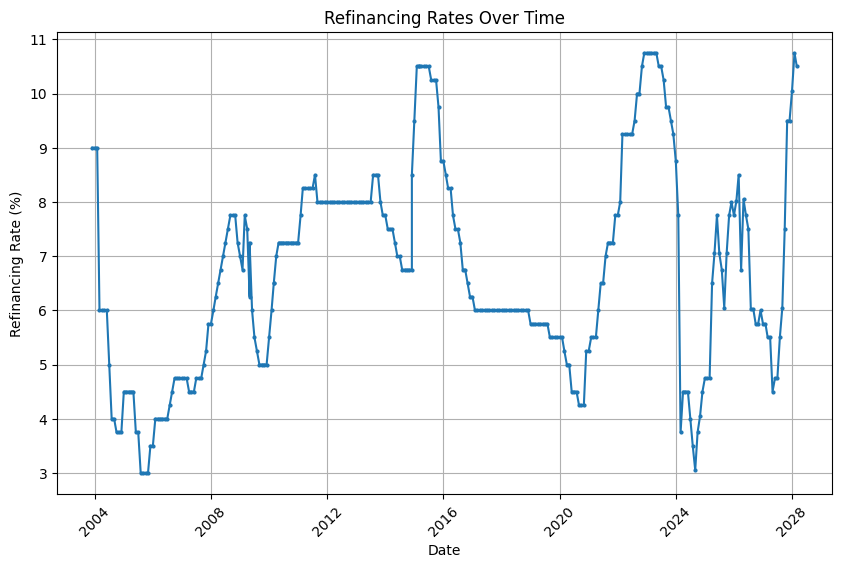

In [98]:
# Now proceed with plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(combined_df['Start_Date'], combined_df['Refinancing_Rates'], marker='o', linestyle='-', markersize=2)
#plt.plot(preds_df['Start_Date'], preds_df['Refinancing_Rates'], marker='o', linestyle='-', markersize=2)
plt.title('Refinancing Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Refinancing Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.show()